In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Show first few rows of the dataset
print(train_data.head())




   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
# Check the shape of the dataset (rows, columns)
print(train_data.shape)



(1460, 81)


In [6]:
# Check for missing values in the dataset
print(train_data.isnull().sum())


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
# Summarize dataset statistics
print(train_data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


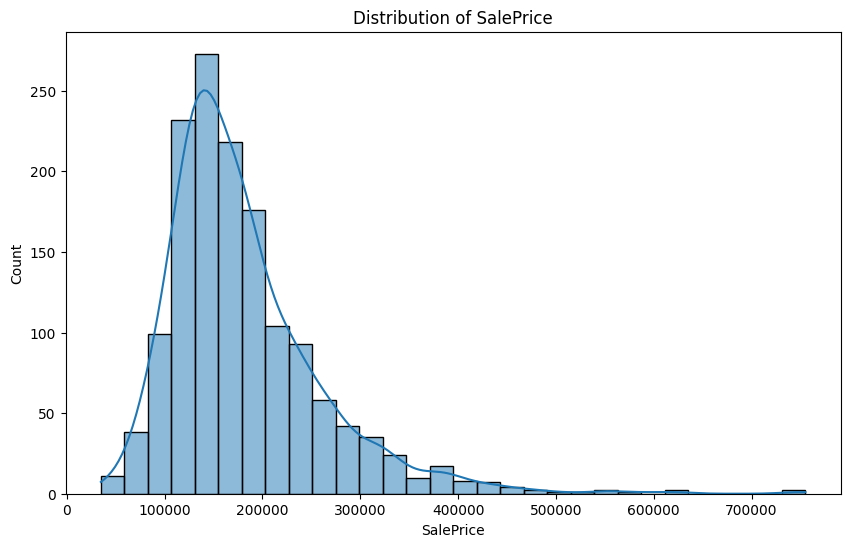

In [8]:
# Plot distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.show()


In [9]:
list(set(train_data.dtypes.tolist()))


[dtype('float64'), dtype('int64'), dtype('O')]

In [10]:
df_num = train_data.select_dtypes(include = ['float64', 'int64'])
df_num.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


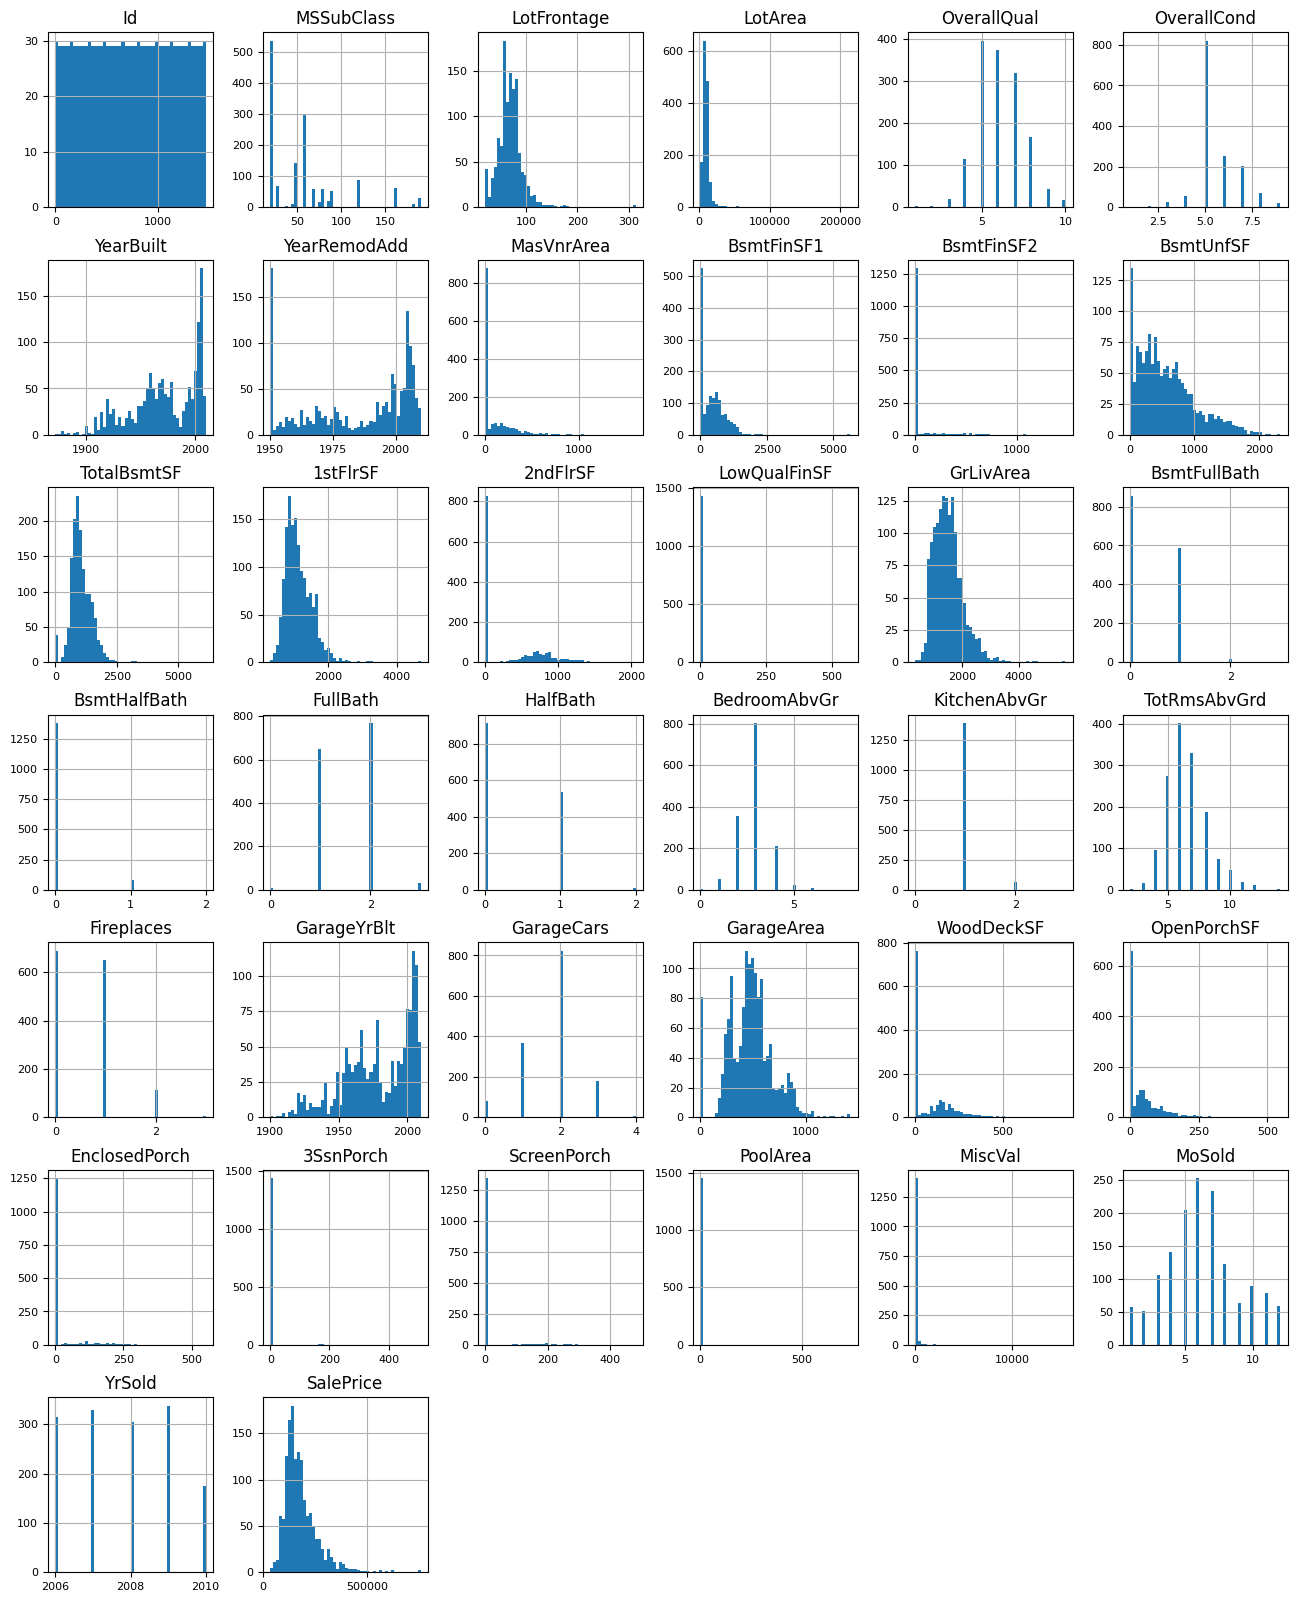

In [11]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [12]:
df_num.isnull().sum().sum()


348

In [13]:
train_data.isnull().sum().sum()


7829

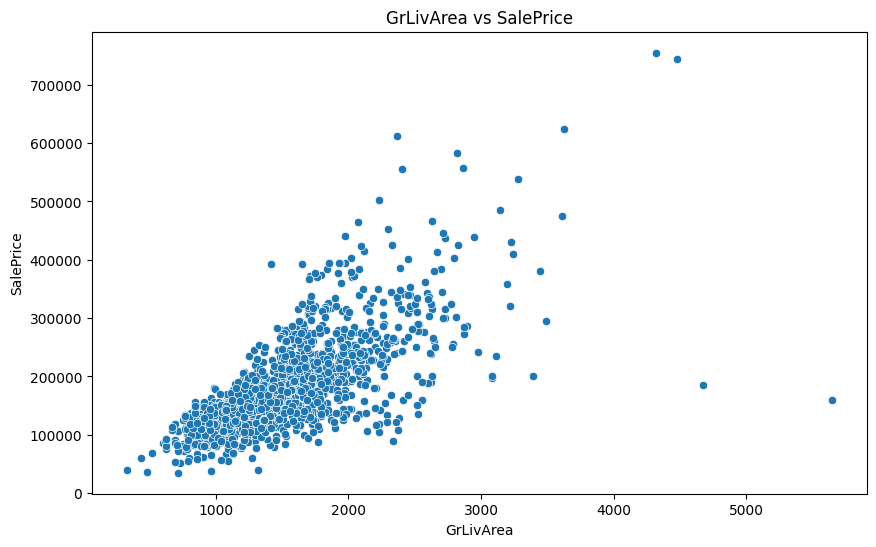

In [14]:
# Scatter plot for GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.show()


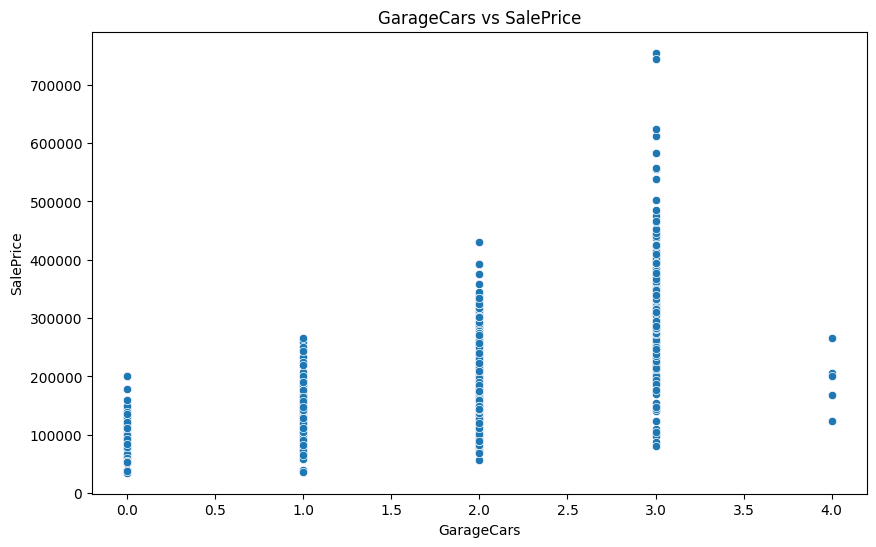

In [15]:
# Scatter plot for GarageCars vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['GarageCars'], y=train_data['SalePrice'])
plt.title('GarageCars vs SalePrice')
plt.show()

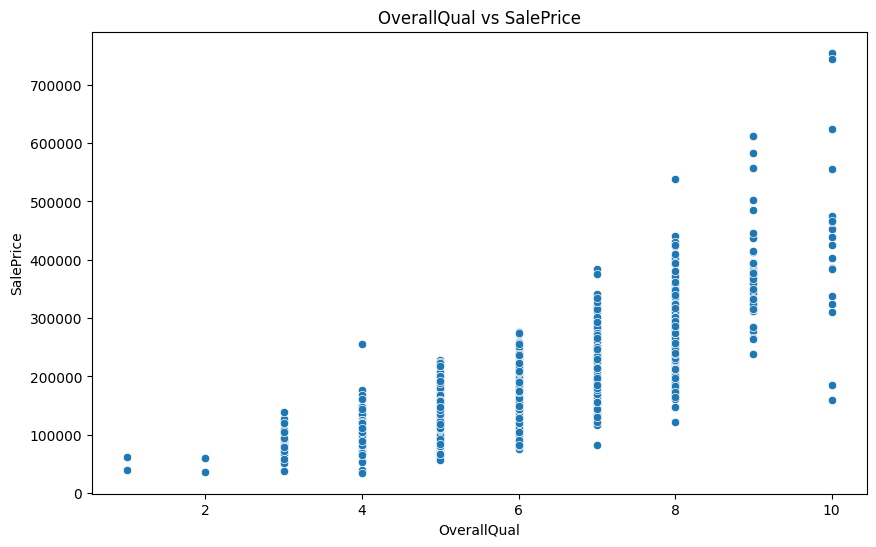

In [16]:
# Scatter plot for OverallQual vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.title('OverallQual vs SalePrice')
plt.show()

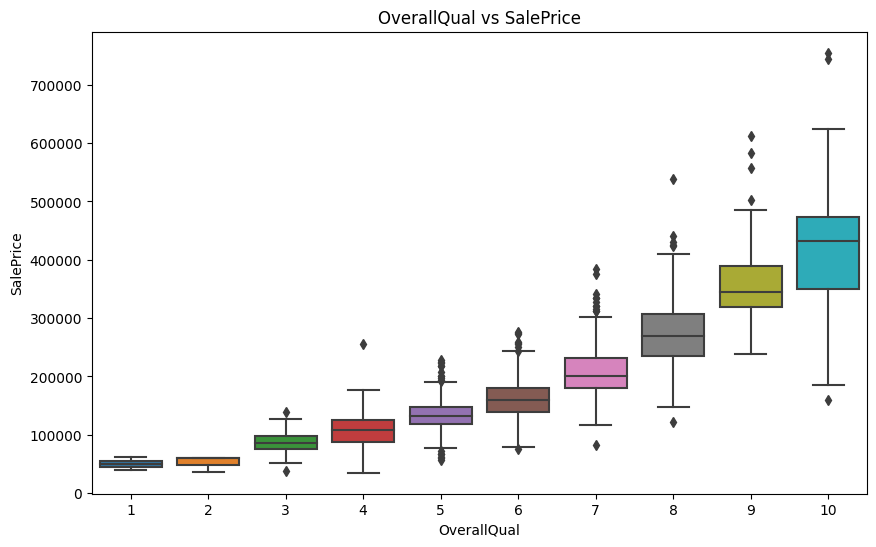

In [17]:
# Box plot for OverallQual vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.title('OverallQual vs SalePrice')
plt.show()


In [19]:
# Remove cat_over_columns. Categorical columns that have 1 type overwhelming than other (>= 90%)
cat_over_columns = ['Street', 'Alley', 'LandContour','Utilities','Condition2','RoofMatl','BsmtCond','Heating','Electrical','Functional','GarageQual','GarageCond','PavedDrive']
train_data.drop(columns=cat_over_columns, inplace=True)


In [21]:
#have alot of NA 

too_much_NA = ['PoolQC', 'Fence', 'MiscFeature']

# Drop too_much_na columns too
train_data.drop(columns=too_much_NA, inplace=True)

# Drop ID column too
train_data.drop(columns=["Id"], inplace=True)

In [24]:
from sklearn.impute import SimpleImputer
#let's fill the missing value first (mean imputation for numeric columns)
num_cols = train_data.select_dtypes(include=['number']).columns


# Mean Imputation for Numerical Columns
mean_imputer = SimpleImputer(strategy='mean')
train_data[num_cols] = mean_imputer.fit_transform(train_data[num_cols])

In [25]:
# there are also some null values in categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Mode Imputation for Categorical Columns
mode_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_cols] = mode_imputer.fit_transform(train_data[categorical_cols])

In [27]:
#cheack null 

train_data.isnull().sum().sum()

0

In [28]:
#Feature selection¶

relevant_columns = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'Neighborhood',
    'Condition1', 'LotArea', 'ExterQual', 'BsmtQual', 'KitchenQual',
    'HeatingQC', 'Fireplaces', 'TotRmsAbvGrd', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'SaleType', 'SaleCondition', 'LotFrontage',
    'MasVnrArea', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MoSold', 'YrSold','SalePrice'
]
# Drop all other columns that are not in the relevant_columns list
train_data = train_data[relevant_columns]

In [30]:
#make sure every thing is good
print(train_data.columns)


Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'Neighborhood',
       'Condition1', 'LotArea', 'ExterQual', 'BsmtQual', 'KitchenQual',
       'HeatingQC', 'Fireplaces', 'TotRmsAbvGrd', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'SaleType', 'SaleCondition', 'LotFrontage',
       'MasVnrArea', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')


In [32]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1456 non-null   float64
 1   GrLivArea      1456 non-null   float64
 2   TotalBsmtSF    1456 non-null   float64
 3   1stFlrSF       1456 non-null   float64
 4   2ndFlrSF       1456 non-null   float64
 5   GarageCars     1456 non-null   float64
 6   GarageArea     1456 non-null   float64
 7   YearBuilt      1456 non-null   float64
 8   YearRemodAdd   1456 non-null   float64
 9   Neighborhood   1456 non-null   object 
 10  Condition1     1456 non-null   object 
 11  LotArea        1456 non-null   float64
 12  ExterQual      1456 non-null   object 
 13  BsmtQual       1456 non-null   object 
 14  KitchenQual    1456 non-null   object 
 15  HeatingQC      1456 non-null   object 
 16  Fireplaces     1456 non-null   float64
 17  TotRmsAbvGrd   1456 non-null   float64
 18  FullBath     

In [33]:
# List of relevant numerical columns where outliers might need to be checked
numerical_columns = [
    'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'GarageCars', 'GarageArea', 'LotArea', 'LotFrontage', 'MasVnrArea'
]

# Function to detect and handle outliers using the IQR method
def handle_outliers(train, column, method='remove'):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if method == 'remove':
        # Remove outliers
        train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]
    elif method == 'cap':
        # Cap outliers
        train[column] = train[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return train

# Apply the outlier handling function to all relevant numerical columns
for column in numerical_columns:
    train_data = handle_outliers(train_data, column, method='remove')  # Change to 'cap' if you prefer to cap outliers instead of removing them

# Verify the changes
print("Data after handling outliers:")
train_data.describe()

Data after handling outliers:


,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageCars,GarageArea,YearBuilt,YearRemodAdd,LotArea,Fireplaces,TotRmsAbvGrd,FullBath,HalfBath,BedroomAbvGr,LotFrontage,MasVnrArea,MoSold,YrSold,SalePrice
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,5.972542,1428.909655,1026.703277,1106.587245,317.109832,1.679362,447.113375,1969.508415,1984.424269,9167.676705,0.544730,6.341895,1.502214,0.350753,2.844110,67.633091,62.793203,6.375554,2007.814880,168696.016829
std,1.247035,421.055484,318.468982,302.368619,406.863664,0.709566,194.006492,30.892202,20.896439,2757.089593,0.615975,1.448290,0.529489,0.495639,0.773316,13.563945,99.636782,2.726083,1.320296,58852.680617
min,1.000000,438.000000,105.000000,438.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000,1974.000000,0.000000,3.000000,0.000000,0.000000,0.000000,33.000000,0.000000,1.000000,2006.000000,34900.000000
25%,5.000000,1100.000000,804.000000,869.000000,0.000000,1.000000,308.000000,1950.000000,1965.000000,7500.000000,0.000000,5.000000,1.000000,0.000000,2.000000,60.000000,0.000000,5.000000,2007.000000,129000.000000
50%,6.000000,1396.000000,969.000000,1052.000000,0.000000,2.000000,462.000000,1971.000000,1993.000000,9100.000000,0.000000,6.000000,1.000000,0.000000,3.000000,69.693400,0.000000,6.000000,2008.000000,157000.000000
75%,7.000000,1694.000000,1216.000000,1301.000000,704.000000,2.000000,565.000000,2000.000000,2003.000000,10800.000000,1.000000,7.000000,2.000000,1.000000,3.000000,75.000000,108.000000,8.000000,2009.000000,197000.000000
max,10.000000,2730.000000,1952.000000,2028.000000,1611.000000,3.000000,954.000000,2010.000000,2010.000000,17104.000000,3.000000,12.000000,3.000000,2.000000,6.000000,105.000000,366.000000,12.000000,2010.000000,446261.000000


In [35]:
train_data.shape


(1129, 31)

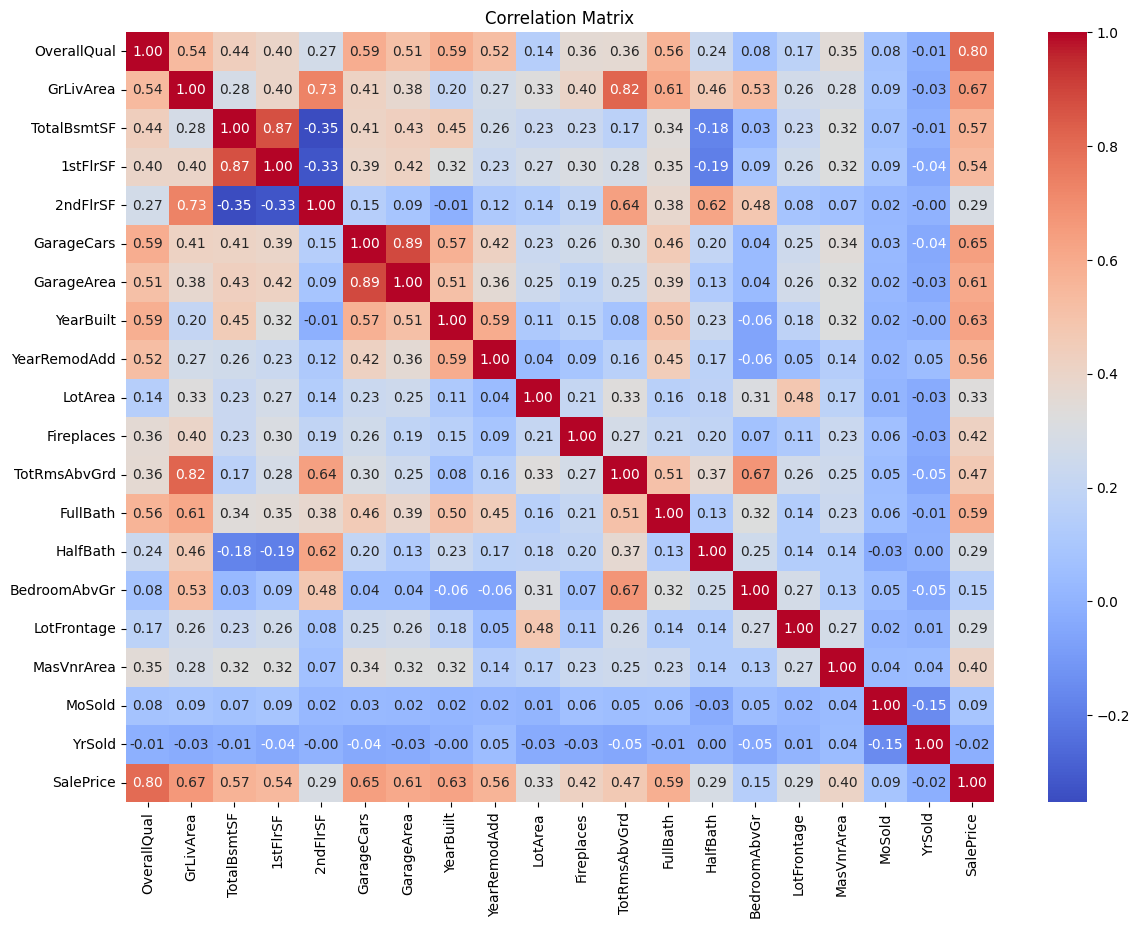

Correlation with SalePrice:
 SalePrice       1.000000
OverallQual     0.800169
GrLivArea       0.665277
GarageCars      0.645805
YearBuilt       0.628956
GarageArea      0.608952
FullBath        0.585081
TotalBsmtSF     0.567582
YearRemodAdd    0.561826
1stFlrSF        0.543463
TotRmsAbvGrd    0.469228
Fireplaces      0.419427
MasVnrArea      0.404077
LotArea         0.329532
LotFrontage     0.294923
2ndFlrSF        0.294916
HalfBath        0.289503
BedroomAbvGr    0.145121
MoSold          0.089305
YrSold         -0.016408
Name: SalePrice, dtype: float64


In [36]:
# Select only numerical columns
numerical_df = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns only
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Focus on correlations with SalePrice
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
print("Correlation with SalePrice:\n", corr_with_saleprice)

In [38]:
#drop weak feature
weak_features = ['BedroomAbvGr', 'MoSold', 'YrSold']
train_data=train_data.drop(columns=weak_features)

In [39]:
from scipy.stats import skew
from numpy import log1p

# Identify skewed features and transform them
skewed_features = train_data[numerical_columns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_features})
print(skewness)

# Apply log1p (log(1 + x)) transformation to skewed features
skewed_features = skewness[skewness['Skew'] > 0.75].index
train_data[skewed_features] = train_data[skewed_features].apply(lambda x: log1p(x))

                 Skew
MasVnrArea   1.419203
2ndFlrSF     0.754475
1stFlrSF     0.597880
GrLivArea    0.527244
TotalBsmtSF  0.500053
LotArea      0.068095
LotFrontage -0.063582
GarageArea  -0.149357
GarageCars  -0.403384


In [41]:
train_data = pd.get_dummies(train_data, columns=[
    'Neighborhood', 'Condition1', 'ExterQual', 'BsmtQual',
    'KitchenQual', 'HeatingQC', 'SaleType', 'SaleCondition',
    'RoofStyle', 'Exterior1st', 'Exterior2nd'
], drop_first=True)

In [44]:
train_data.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'LotArea',
       ...
       'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',
       'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng'],
      dtype='object', length=105)

In [45]:
train_data.shape[1]


105

In [46]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                      'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd',
                      'LotArea', 'LotFrontage', 'MasVnrArea', 'Fireplaces',
                      'TotRmsAbvGrd', 'FullBath', 'HalfBath']

train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [48]:
# Define features and target variable
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

In [49]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [50]:
X_train.shape[0],X_test.shape[0],y_train.shape[0],y_test.shape[0]


(790, 339, 790, 339)

In [51]:
# Build a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [52]:
y_pred = linear_model.predict(X_test)


In [53]:
y_pred


array([ 2.21417326e+05,  1.53170575e+05,  1.23927298e+05,  1.14335537e+05,
        1.57288401e+05,  1.41684038e+05,  1.92102833e+05,  1.42349146e+05,
        1.36104234e+05,  2.67041592e+05,  1.27900284e+05,  1.78143707e+05,
        1.43124131e+05,  1.77843392e+05,  1.83183394e+05,  1.95364415e+05,
        1.51446705e+05,  1.36172823e+05,  2.01108195e+05,  2.09411379e+05,
        2.15118915e+05,  7.46883368e+04,  2.24046672e+05,  1.59811664e+05,
        2.13326944e+05,  1.81087197e+05,  1.16542450e+05,  1.75101372e+05,
        8.06050259e+04,  1.78220745e+05,  1.35064024e+05,  1.41171980e+05,
        1.11917753e+05,  1.20665324e+05,  1.88937933e+05,  1.84193028e+05,
        1.56673407e+05,  1.10149085e+05,  1.89033506e+05,  2.08547369e+05,
        1.78578920e+05,  1.35194794e+05,  1.28754794e+05,  1.14938497e+05,
        1.29441050e+05,  2.01275942e+05,  1.05045605e+05,  1.79170478e+05,
        1.96296416e+05,  1.40547633e+05,  1.80091413e+05,  2.59932146e+05,
        1.96645766e+05,  

In [54]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Calculate RMSE
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 1.5005869545186298e+29
Root Mean Squared Error: 387374102711917.2


In [55]:
from sklearn.linear_model import Ridge

# Initialize and fit the Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')
# Calculate RMSE
rmse_ridge = np.sqrt(np.mean((y_test - y_pred_ridge) ** 2))
print(f'square Root Mean Squared Error: {rmse_ridge}')

Mean Squared Error (Ridge): 503209886.589717
square Root Mean Squared Error: 22432.340194231117


In [56]:
y_pred_ridge


array([222300.72917124, 152842.60327142, 122390.80939582, 128962.84278207,
       165509.80544001, 141648.74058873, 191984.68915867, 140026.7741024 ,
       134711.55097129, 266367.66894381, 127277.06324665, 180962.03043897,
       143095.72144617, 178048.81930236, 184841.51149267, 196493.39753088,
       154661.2443202 , 136116.93684516, 200860.577992  , 199910.28489624,
       215557.61668669,  77288.17215023, 224938.35381717, 161151.98683963,
       205432.48331768, 180265.69353356, 115806.61908481, 177214.25187876,
        85659.09988576, 177478.17440503, 135215.02110187, 139375.53246783,
       111034.33831732, 120398.19762064, 186789.60296608, 189498.35290019,
       160165.19812834, 123108.33768651, 189071.42499327, 207112.50374769,
       179061.18322211, 132694.72275728, 125957.50851143, 116575.45142315,
       128428.53673886, 201899.94222653,  98727.73944784, 178732.95073712,
       197364.08645808, 140364.23283664, 180894.46162698, 258608.67962394,
       202770.24705129,  

In [57]:
from sklearn.linear_model import Lasso

# Initiate and fit the Lasso model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean squared error (lasso): {mse_lasso}')
# Calculate RMSE
rmse_lasso = np.sqrt(np.mean((y_test - y_pred_lasso) ** 2))
print(f'square Root Mean Squared Error: {rmse_lasso}')

Mean squared error (lasso): 515942367.96373934
square Root Mean Squared Error: 22714.36479331393


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.105e+10, tolerance: 2.692e+08
  model = cd_fast.enet_coordinate_descent(


In [58]:
y_pred_lasso


array([221412.15861086, 153091.98151144, 123939.62409841, 114761.99881015,
       157350.05866099, 141705.97715468, 192150.87753387, 142369.30158509,
       136138.6181444 , 266907.75319927, 127895.75812407, 178139.9814169 ,
       143049.06313173, 177724.28352824, 183128.36457719, 195393.25337596,
       151399.80607783, 136168.35580207, 201119.67719853, 209323.64695361,
       215102.5809035 ,  74650.24422186, 224017.03494907, 159725.84194861,
       213365.04018404, 181108.82435608, 116581.08581404, 175044.04326075,
        80696.08078047, 178258.87882723, 135115.04391223, 141105.49948401,
       111757.379381  , 120656.23118104, 188845.39937004, 184221.32438595,
       156634.07395298, 110415.9546979 , 188947.50147831, 208521.91366681,
       178555.7277255 , 135272.7569245 , 128822.99844774, 115033.28243469,
       129398.62312121, 201332.86922949, 105183.69093196, 179155.47370084,
       196193.79189196, 140517.72852972, 179614.91359827, 259835.72308557,
       196644.91805807,  

In [59]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and fit the Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Mean Squared Error (Decision Tree): {mse_tree}')
# Calculate RMSE
rmse_tree = np.sqrt(np.mean((y_test - y_pred_tree) ** 2))
print(f'square Root Mean Squared Error: {rmse_tree}')

Mean Squared Error (Decision Tree): 1104037131.5351512
square Root Mean Squared Error: 33227.05421091601


In [60]:
y_pred_tree


array([223628.70454545, 155033.6875    , 135717.09302326, 135717.09302326,
       193350.43137255, 137084.88235294, 193350.43137255, 155033.6875    ,
       111720.83076923, 258079.06666667, 135717.09302326, 186457.70526316,
       118765.12727273, 193350.43137255, 172391.66666667, 223628.70454545,
       137084.88235294, 137084.88235294, 223628.70454545, 186457.70526316,
       223628.70454545, 135625.92592593, 223628.70454545, 118765.12727273,
       172391.66666667, 144539.39393939, 118765.12727273, 172391.66666667,
        98890.875     , 193350.43137255, 144539.39393939, 144539.39393939,
       118765.12727273, 137084.88235294, 118765.12727273, 186457.70526316,
       172391.66666667, 118765.12727273, 172391.66666667, 118700.        ,
       186457.70526316, 111720.83076923, 135717.09302326, 118700.        ,
       135717.09302326, 186457.70526316, 111720.83076923, 172391.66666667,
       186457.70526316, 118765.12727273, 135717.09302326, 227509.72      ,
       186457.70526316, 1

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')
# Calculate RMSE
rmse_rf = np.sqrt(np.mean((y_test - y_pred_rf) ** 2))
print(f'square Root Mean Squared Error: {rmse_rf}')

Mean Squared Error (Random Forest): 649337078.1623896
square Root Mean Squared Error: 25482.093284547675


In [62]:
y_pred_rf


array([214386.67357428, 145159.5388016 , 137866.14193443, 126362.944728  ,
       176530.97287347, 148409.19379224, 181294.21590105, 143317.54128402,
       145260.97909701, 238456.12804154, 137216.48985871, 168972.28631215,
       133609.88509848, 176811.48089904, 176120.12573738, 203998.68557136,
       142244.06397157, 120993.2547816 , 196077.2870353 , 196655.79619953,
       220652.72866045, 109199.17374132, 224378.63650201, 134276.49035814,
       169392.01665789, 162080.65225717, 131803.74213196, 168216.85806237,
       107542.01001588, 179517.46145271, 145556.58594929, 143303.39491884,
       129156.69476899, 126239.75587953, 137437.08669032, 198650.61343262,
       167140.2474019 , 141399.53932145, 181178.02791654, 163032.68061507,
       170909.32708138, 122679.71449156, 123122.97155638, 114108.89649542,
       149558.49292616, 201278.96768384, 108771.19176252, 187819.6783664 ,
       188770.64729516, 141061.87160114, 160700.13343996, 248245.84692583,
       202700.00225658, 1

In [63]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE for Linear Regression
mape_lr = mean_absolute_percentage_error(y_test, y_pred) * 100

# Calculate MAPE for Ridge Regression
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100

# Calculate MAPE for Lasso Regression
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso) * 100

# Calculate MAPE for Decision Tree
mape_tree = mean_absolute_percentage_error(y_test, y_pred_tree) * 100

# Calculate MAPE for Random Forest
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100


# Compare METRICS values
metrics_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest'],
    'MAPE (%)': [mape_lr, mape_ridge, mape_lasso, mape_tree, mape_rf],
    'MSE' : [mse,mse_ridge,mse_lasso,mse_tree, mse_rf],
    'RMSE' : [rmse, rmse_ridge, rmse_lasso, rmse_tree, rmse_rf]
})

metrics_results.sort_values(by='MAPE (%)', ascending=True)


,Model,MAPE (%),MSE,RMSE
1,Ridge Regression,9.900963e+00,5.032099e+08,2.243234e+04
2,Lasso Regression,1.004953e+01,5.159424e+08,2.271436e+04
4,Random Forest,1.032199e+01,6.493371e+08,2.548209e+04
3,Decision Tree,1.427931e+01,1.104037e+09,3.322705e+04
0,Linear Regression,3.506546e+10,1.500587e+29,3.873741e+14


In [70]:
import joblib

joblib.dump(linear_model,'linear_model.pkl')

['linear_model.pkl']

In [68]:
joblib.dump(lasso_model,'lasso_model.pkl')


['lasso_model.pkl']

In [69]:
joblib.dump(ridge_model,'ridge_model.pkl')


['ridge_model.pkl']

In [71]:
joblib.dump(rf_model,'rf_model.pkl')


['tree_model.pkl']

In [72]:
joblib.dump(tree_model,'tree_model.pkl')

['tree_model.pkl']